In [1]:
import numpy as np
import matplotlib.pyplot as plt
import crocoddyl


<Figure size 432x288 with 0 Axes>

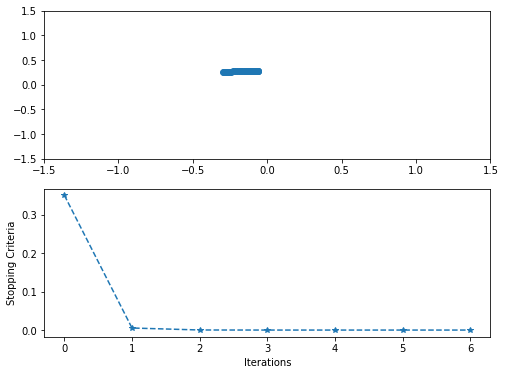

In [84]:
x  = [np.random.uniform(-1.5,1.5), np.random.uniform(-1.5,1.5), np.random.uniform(-np.pi/4, np.pi/4)]
x0 = np.array(x)

model               = crocoddyl.ActionModelUnicycle()
model.costWeights   = np.array([1.,1.]).T
problem             = crocoddyl.ShootingProblem(x0.T, [model]*30, model)
ddp                 = crocoddyl.SolverDDP(problem)
log                 = crocoddyl.CallbackLogger()
ddp.setCallbacks([log])
ddp.solve([], [], 1000)
stops = log.stops[1:]
xs = np.array(ddp.xs)


plt.clf()
fig, (axs1,axs2) = plt.subplots(2, figsize=(8,6))

axs1.plot(xs[:,0], xs[:,1], '--o')
axs1.set_xlim([-1.5, 1.5])
axs1.set_ylim([-1.5, 1.5])

axs2.plot(stops, '--*')
axs2.set_ylabel("Stopping Criteria")
axs2.set_xlabel("Iterations")




#plt.savefig("Wierd3.png")

plt.show()